### EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000



### Choosing features with correlation factor higher than 0.35

In [3]:
corr_features = df.corr().iloc[-1]
corr_features = np.array(corr_features[corr_features>0.35].index)

df[corr_features].describe()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,6.099315,1971.267808,1984.865753,103.685262,443.639726,1057.429452,1162.626712,1515.463699,1.565068,6.517808,0.613014,1978.506164,1.767123,472.980137,180921.195890
std,24.284752,1.382997,30.202904,20.645407,181.066207,456.098091,438.705324,386.587738,525.480383,0.550916,1.625393,0.644666,24.689725,0.747315,213.804841,79442.502883
min,21.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,334.000000,334.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,34900.000000
25%,59.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,795.750000,882.000000,1129.500000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,129975.000000
50%,69.000000,6.000000,1973.000000,1994.000000,0.000000,383.500000,991.500000,1087.000000,1464.000000,2.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,163000.000000
75%,80.000000,7.000000,2000.000000,2004.000000,166.000000,712.250000,1298.250000,1391.250000,1776.750000,2.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,214000.000000
max,313.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,6110.000000,4692.000000,5642.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,755000.000000


#### Fill null values

In [4]:
df[corr_features] = df[corr_features].fillna(df[corr_features].median())
df[corr_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1460 non-null   float64
 1   OverallQual   1460 non-null   int64  
 2   YearBuilt     1460 non-null   int64  
 3   YearRemodAdd  1460 non-null   int64  
 4   MasVnrArea    1460 non-null   float64
 5   BsmtFinSF1    1460 non-null   int64  
 6   TotalBsmtSF   1460 non-null   int64  
 7   1stFlrSF      1460 non-null   int64  
 8   GrLivArea     1460 non-null   int64  
 9   FullBath      1460 non-null   int64  
 10  TotRmsAbvGrd  1460 non-null   int64  
 11  Fireplaces    1460 non-null   int64  
 12  GarageYrBlt   1460 non-null   float64
 13  GarageCars    1460 non-null   int64  
 14  GarageArea    1460 non-null   int64  
 15  SalePrice     1460 non-null   int64  
dtypes: float64(3), int64(13)
memory usage: 182.6 KB


### Remove redundant features

In [5]:
corr_features = np.delete(corr_features, np.where(corr_features == ['GarageArea']))
corr_features = np.delete(corr_features, np.where(corr_features == ['TotlRmsAbvGrd']))

### Encoding categorical features

In [6]:
cat_features = df[corr_features].select_dtypes(include='object').columns
LE = LabelEncoder()

for feature in cat_features:
    df[feature] = LE.fit_transform(df[feature])

#### Correlation heatmap

<AxesSubplot:>

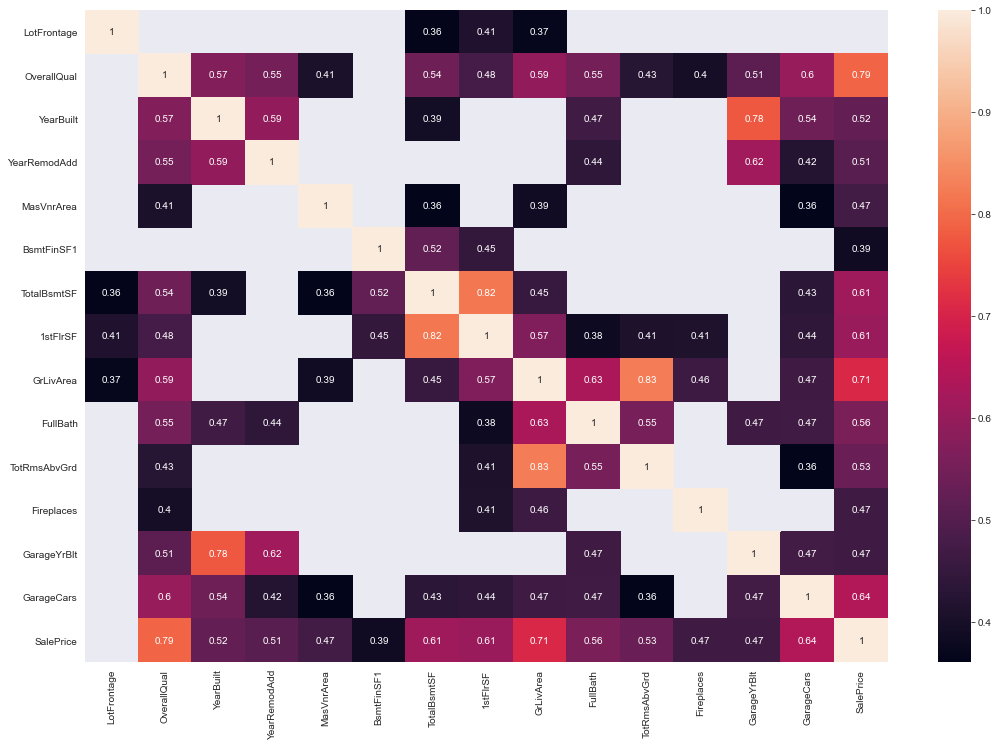

In [7]:
corr = df[corr_features].corr()

plt.figure(figsize=(18, 12))
sns.heatmap(corr[abs(corr) > 0.35], annot=True)

###

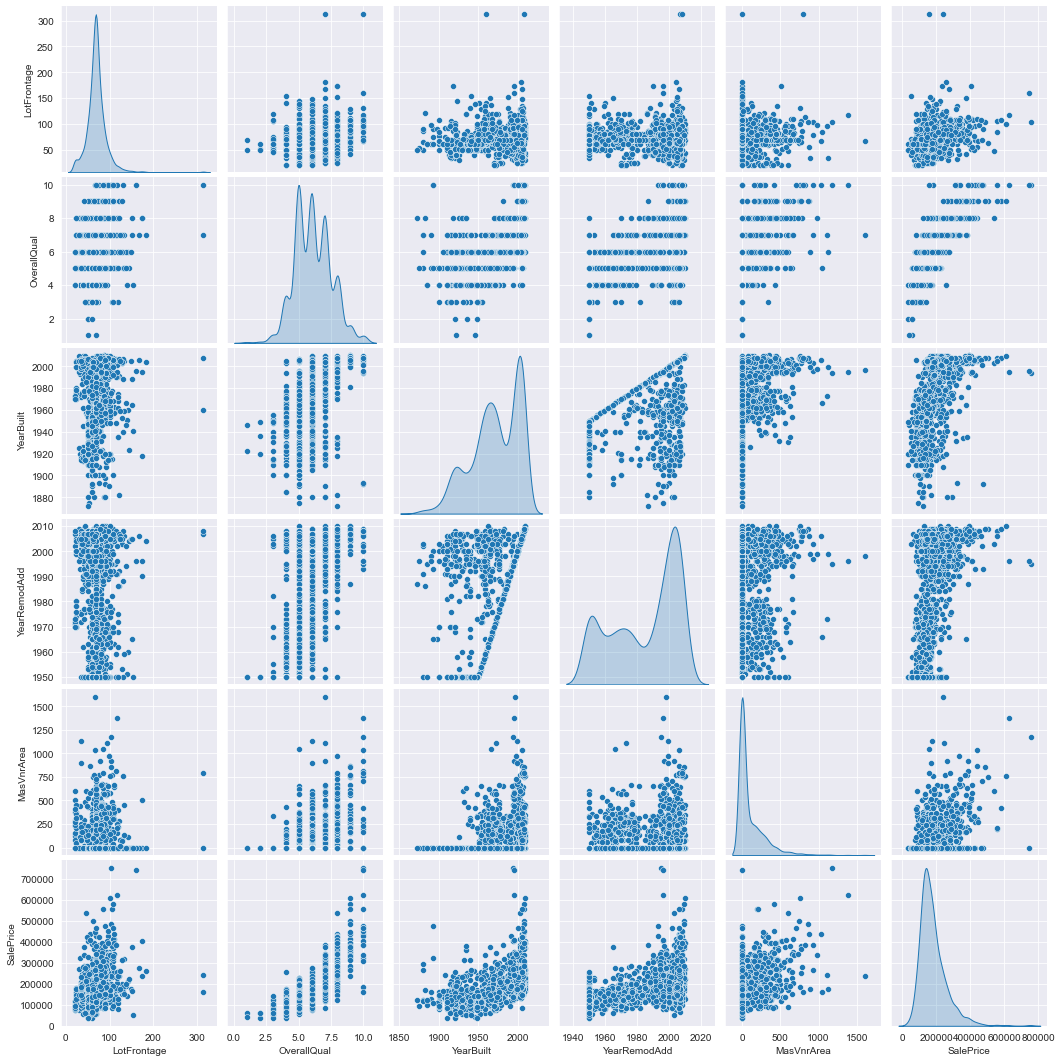

In [8]:
sns.pairplot(df[corr_features[[0, 1, 2, 3, 4, -1]]], diag_kind='kde')
plt.show()

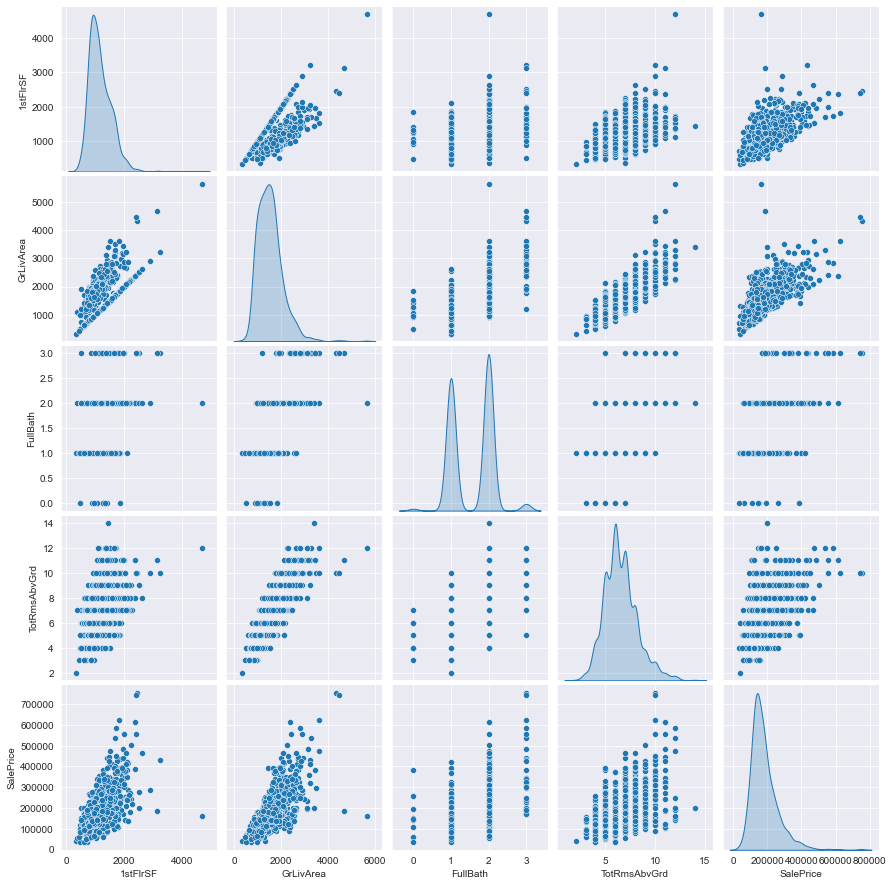

In [9]:
sns.pairplot(df[corr_features[[7, 8, 9, 10,  -1]]], diag_kind='kde')
plt.show()

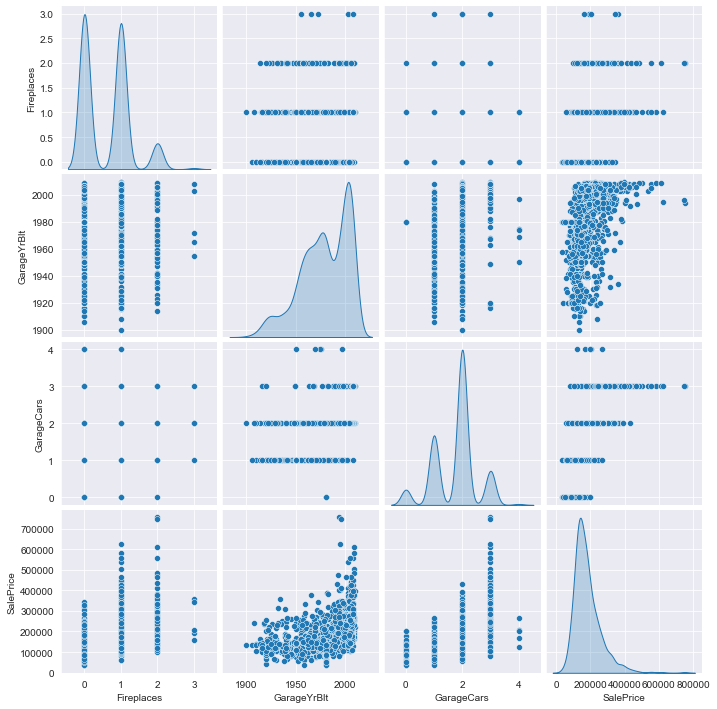

In [10]:
sns.pairplot(df[corr_features[11:]], diag_kind='kde')
plt.show()

## Model Prototypes

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from scipy import stats
import math

if 'SalePrice' not in corr_features:
    corr_features = np.append(corr_features, 'SalePrice')

df = df[corr_features]
    
#Outliers
df = df[(np.abs(stats.zscore(df)) < 2).all(axis=1)]


In [14]:


##Seperate the target variable from the independent features
if 'SalePrice' in corr_features:
    corr_features = np.delete(corr_features, np.where(corr_features == 'SalePrice'))

Y = df['SalePrice']
X = df[corr_features]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

#Standardization
scaler = StandardScaler().fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), columns = x_train.columns, index = x_train.index)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns, index = x_test.index)


x_train.shape

(758, 14)

### Ensemble Learning Prototype

In [15]:
rf_regressor = RandomForestRegressor(n_estimators = 500, max_depth = 4)
rf_regressor.fit(x_train, y_train)


RandomForestRegressor(max_depth=4, n_estimators=500)

In [16]:
rf_regressor.score(x_train, y_train)

0.8641302288819976

In [17]:
y_pred = rf_regressor.predict(x_test)
print('Test R2 Score: {}, RMSLE: {}'.format(rf_regressor.score(x_test, y_test), 
                                          math.sqrt(mean_squared_log_error(y_test, y_pred)) ))


error = y_test-y_pred

Test R2 Score: 0.7478307357792184, RMSLE: 0.13812717340525726


## Regularized regression

In [18]:
ridge_regressor = Ridge(alpha = 0.25)
ridge_regressor.fit(x_train, y_train)

ridge_regressor.score(x_train, y_train)

0.8428531942114766

In [19]:
y_pred = ridge_regressor.predict(x_test)
print('Test R2 Score: {}, RMSLE: {}'.format(ridge_regressor.score(x_test, y_test), 
                                          math.sqrt(mean_squared_log_error(y_test, y_pred)) ))


error = y_test-y_pred

Test R2 Score: 0.7991808300764258, RMSLE: 0.1327396240464237


### Ada Boost

In [20]:
ADB_regressor = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth = 4), n_estimators= 500)
ADB_regressor.fit(x_train, y_train)

ADB_regressor.score(x_train, y_train)

0.8993991167316453

In [21]:
y_pred = ADB_regressor.predict(x_test)
print('Test R2 Score: {}, RMSLE: {}'.format(ADB_regressor.score(x_test, y_test), 
                                          math.sqrt(mean_squared_log_error(y_test, y_pred)) ))


error = y_test-y_pred

Test R2 Score: 0.7313080143196324, RMSLE: 0.14312423771278232


### Stacking Regressor

In [26]:
stacking_estimators = [('random_forest', RandomForestRegressor(n_estimators = 500, max_depth = 4)),
                       ('linear_ridge', Ridge(0.2)), ('ada_boost', AdaBoostRegressor(DecisionTreeRegressor(max_depth = 4), n_estimators = 500
                        )), ('SVM', LinearSVR())]

In [27]:
stacking_regressor = StackingRegressor(estimators = stacking_estimators, 
                                       final_estimator = Ridge(0.3))

In [28]:
stacking_regressor.fit(x_train, y_train)
stacking_regressor.score(x_train, y_train)

0.8732171275394489

In [29]:
y_pred = stacking_regressor.predict(x_test)
print('Test R2 Score: {}, RMSLE: {}'.format(stacking_regressor.score(x_test, y_test), 
                                          math.sqrt(mean_squared_log_error(y_test, y_pred)) ))


error = y_test-y_pred

Test R2 Score: 0.7968599264712554, RMSLE: 0.128634358716081


### Error Analysis

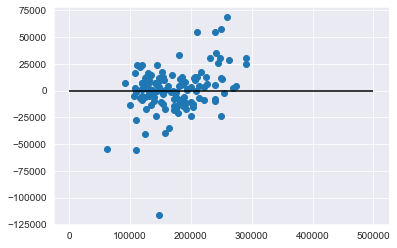

In [30]:
plt.scatter(y_test, y_test-y_pred)
plt.hlines(y=0, xmin = 0, xmax = 500000, color='black')

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

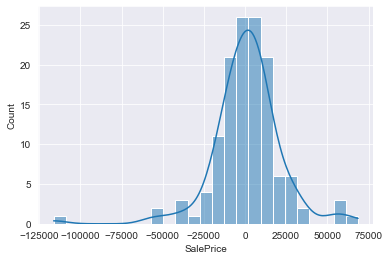

In [31]:
sns.histplot(error, kde=True)

 <br>
 <br>
 <br> 
 
<h2> Submissions</h2>

In [32]:
sub_data = pd.read_csv('test.csv')

for feature in cat_features:
    sub_data[feature] = LE.transform(sub_data[feature])
    
sub_X = sub_data[corr_features]

sub_X = pd.DataFrame(scaler.transform(sub_X), columns = sub_X.columns, index = sub_X.index)
sub_X = sub_X.fillna(sub_X.median())

In [33]:
predictions = stacking_regressor.predict(sub_X)

In [34]:
submission = pd.read_csv('sample_submission.csv')
submission['SalePrice'] = predictions

In [35]:
submission.to_csv('submission.csv', index=False)

In [36]:
submission

,Id,SalePrice
0,1461,114440.728349
1,1462,154058.874213
2,1463,186503.118720
3,1464,192131.595236
4,1465,191216.104669
...,...,...
1454,2915,87056.965691
1455,2916,96003.674032
1456,2917,176079.046486
1457,2918,128753.293500
